### Happiness Analysis: Understanding Key Factors
<b>Objective:</b><br>
This analysis aims to explore key factors affecting happiness levels across nations, categorizing countries into three groups based on their happiness scores: High, Moderate, and Low Happiness.

<b>Happiness Grouping</b><br>
Countries are classified into three groups: High Happiness (score >= 6.5), Moderate Happiness (6.5 > score >= 5), Low Happiness (score < 5).

<b>Dataset Overview:</b><br>
Source Year: 2022<br>
Factors Examined: "GDP per Capita", "Population Growth Rate", "Birth & Death Rates", "Median Age of Population", "Unemployment Rate", "Education Expenditures", "Social Support", "Healthy Life", "Expectancy", "Freedom to Make Life Choices", "Generosity", "Perceptions of Corruption"

In [81]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [82]:
cwd = os.getcwd()
data_file_path = cwd + '/processed_data_2022/master_data_2022.csv'
df = pd.read_csv(data_file_path, encoding='utf-8')

### Clean Data

The rows with missing values in the columns of interest will be dropped. <br>
The non-categorical columns will be converted to float. <br>
Some of the numbers in the data are using commas as decimal points, which needs to be replaced with commas before conversion.

In [83]:
# Drop rows with missing values
cols_to_check = ['education_expenditures', 'population_growth_rate', 'birth_rate', 'death_rate', 
                 'unemployment_rate', 'happiness_score', 'GDP_per_capita', 'social_support', 
                 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 
                 'perceptions_of_corruption', 'median_age']
df.dropna(subset=cols_to_check, inplace=True)
# Replace ',' with '.' for float conversion
for col in df.columns:
    if col not in ['country_name', 'country_code', 'region', 'population']:
        df[col] = df[col].astype(str).str.replace(',', '.')
# Convert columns to float type where applicable
for col in df.columns:
    if col not in ['country_name', 'country_code', 'region', 'population']:
        df[col] = df[col].astype(float)
# Drop columns that are not needed for analysis
df.drop(columns=['whisker-high', 'whisker-low', 'dystopia(1.83)+residual'], inplace=True)

### View Data

The first 5 rows look as follows.

In [84]:
df.head()

,country_name,country_code,education_expenditures,region,population,population_growth_rate,birth_rate,death_rate,unemployment_rate,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,median_age
1,Afghanistan,AF,2.9,South Asia,"38,346,720",2.30,35.46,12.33,23.90,2.404,0.758,0.000,0.289,0.000,0.089,0.005,19.5
5,Albania,AL,3.1,Europe,"3,095,344",0.22,12.69,7.31,5.83,5.199,1.439,0.646,0.719,0.511,0.138,0.028,34.3
7,United Arab Emirates,AE,3.9,Middle East,"9,915,803",0.58,10.81,1.56,1.60,6.576,1.998,0.980,0.633,0.702,0.204,0.250,38.4
8,Argentina,AR,5.0,South America,"46,245,668",0.82,15.58,7.32,9.84,5.967,1.592,1.102,0.662,0.555,0.081,0.085,32.4
9,Armenia,AM,2.8,Middle East,"3,000,756",-0.38,11.10,9.51,18.90,5.399,1.434,0.820,0.668,0.558,0.054,0.210,36.6


In [85]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 1 to 248
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_name                  105 non-null    object 
 1   country_code                  105 non-null    object 
 2   education_expenditures        105 non-null    float64
 3   region                        105 non-null    object 
 4   population                    105 non-null    object 
 5   population_growth_rate        105 non-null    float64
 6   birth_rate                    105 non-null    float64
 7   death_rate                    105 non-null    float64
 8   unemployment_rate             105 non-null    float64
 9   happiness_score               105 non-null    float64
 10  GDP_per_capita                105 non-null    float64
 11  social_support                105 non-null    float64
 12  healthy_life_expectancy       105 non-null    float64
 13  freed

(105, 17)

### Classify Countries

In [86]:
# classify countries based on happiness score
conditions = [df['happiness_score'] >= 6.5, (df['happiness_score'] >= 5.0) & (df['happiness_score'] < 6.5), df['happiness_score'] < 5.0]
# create a new column happiness_gourp
df['happiness_group'] = np.select(conditions, ['high', 'moderate', 'low'])

### Descriptive Statistics

In [87]:
df.describe()

,education_expenditures,population_growth_rate,birth_rate,death_rate,unemployment_rate,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,median_age
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,4.664762,0.901143,16.963429,7.985714,9.211619,5.733457,1.470286,0.931724,0.612610,0.540362,0.145371,0.158086,32.497143
std,1.513655,1.008916,8.987845,2.962242,10.079802,1.111599,0.392582,0.291778,0.163279,0.137753,0.078305,0.133713,9.179832
min,0.500000,-1.110000,6.950000,1.560000,0.300000,2.404000,0.578000,0.000000,0.191000,0.000000,0.000000,0.000000,15.700000
25%,3.600000,0.240000,10.360000,5.720000,4.300000,5.046000,1.167000,0.732000,0.518000,0.476000,0.089000,0.062000,25.300000
50%,4.600000,0.790000,14.220000,7.710000,6.400000,5.948000,1.508000,1.029000,0.640000,0.563000,0.134000,0.116000,32.600000
75%,5.900000,1.400000,19.290000,9.640000,9.840000,6.476000,1.815000,1.169000,0.748000,0.651000,0.199000,0.208000,41.600000
max,9.100000,3.340000,41.150000,16.390000,77.000000,7.821000,2.149000,1.320000,0.866000,0.740000,0.468000,0.587000,48.600000


### Visualize Distributions

- Histograms for continuous variables
- Bar plot of happiness score by region

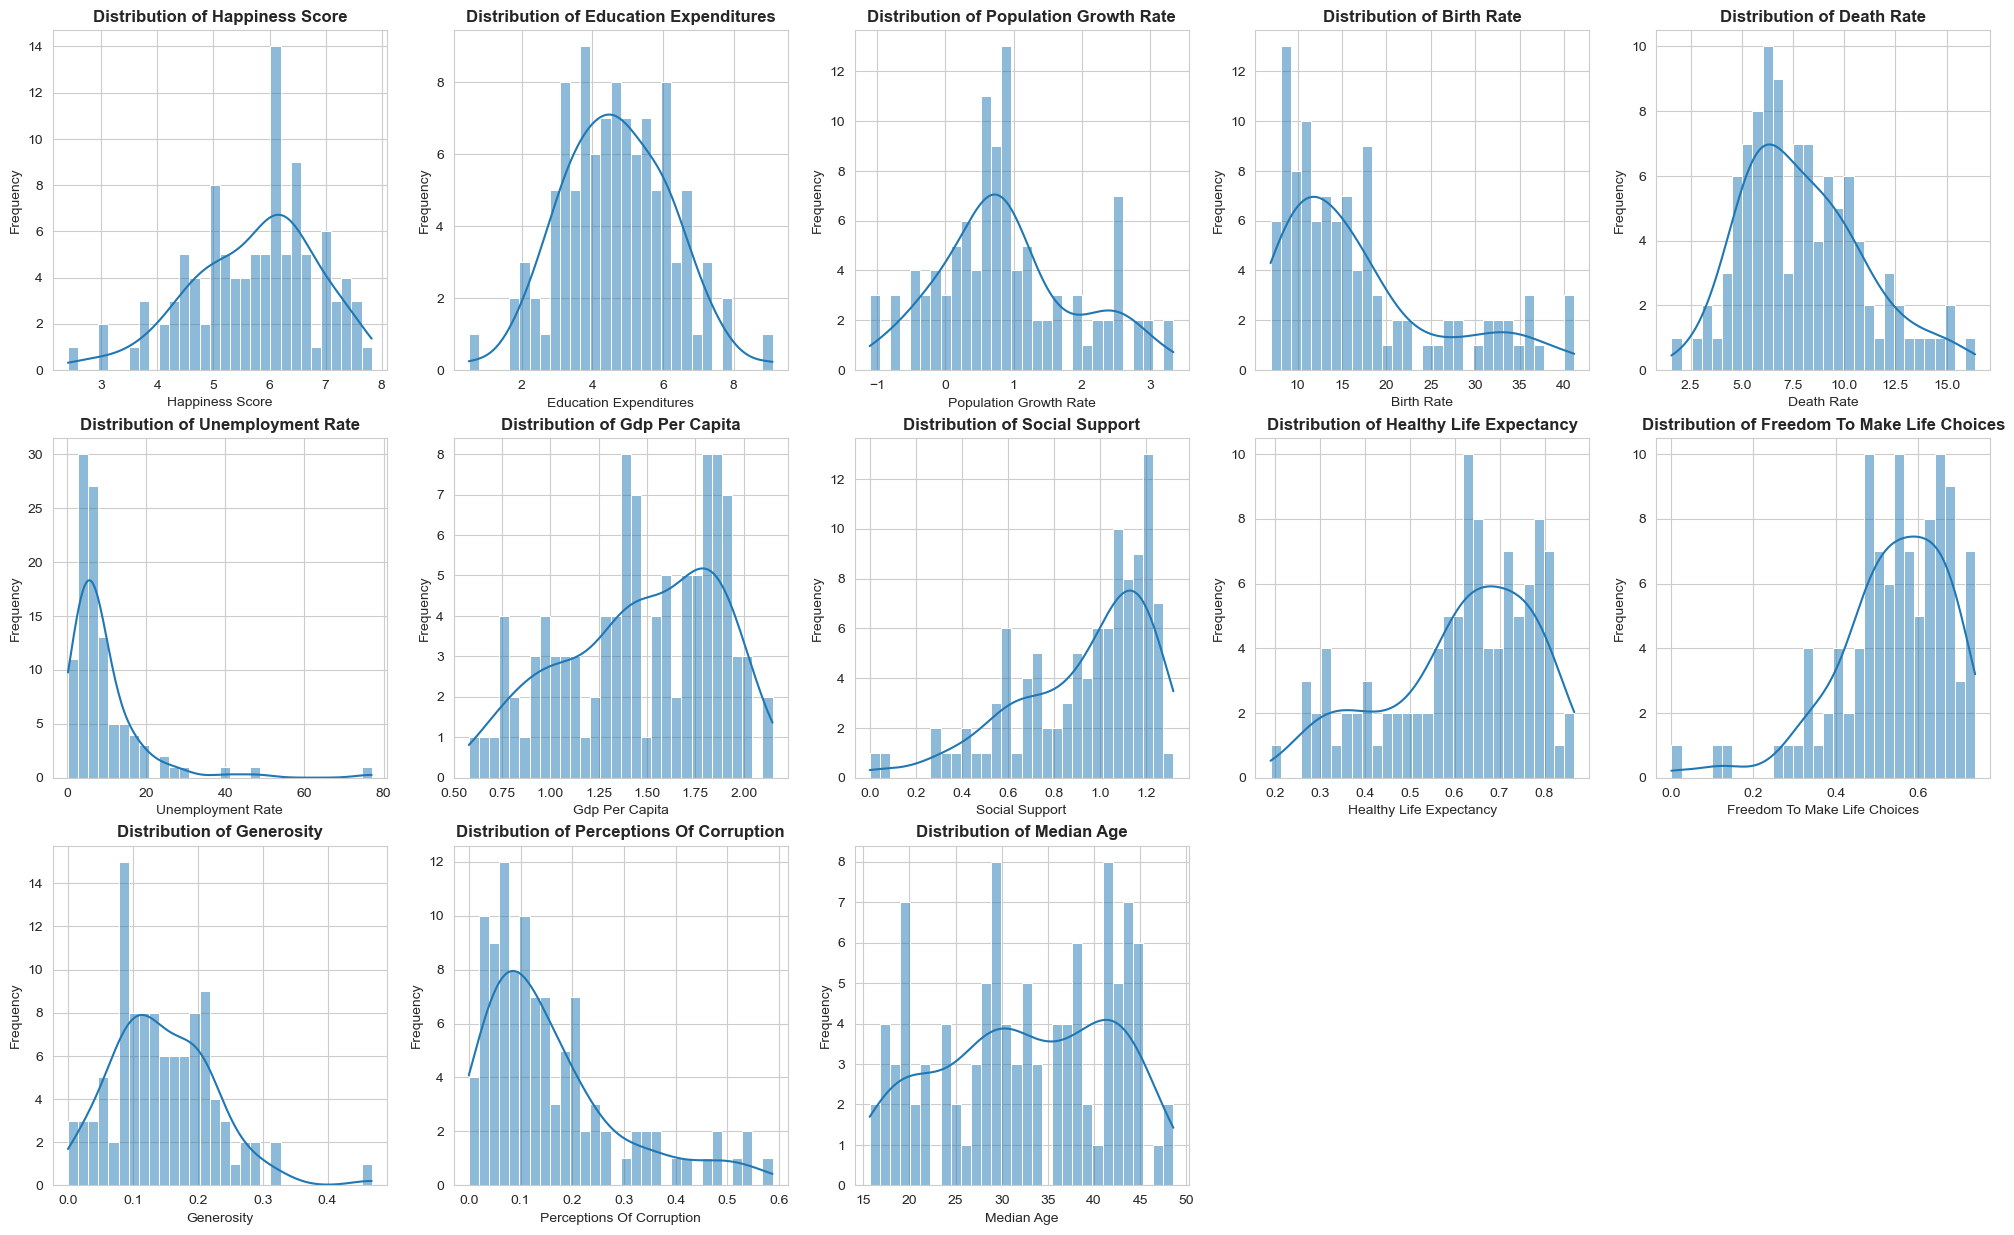

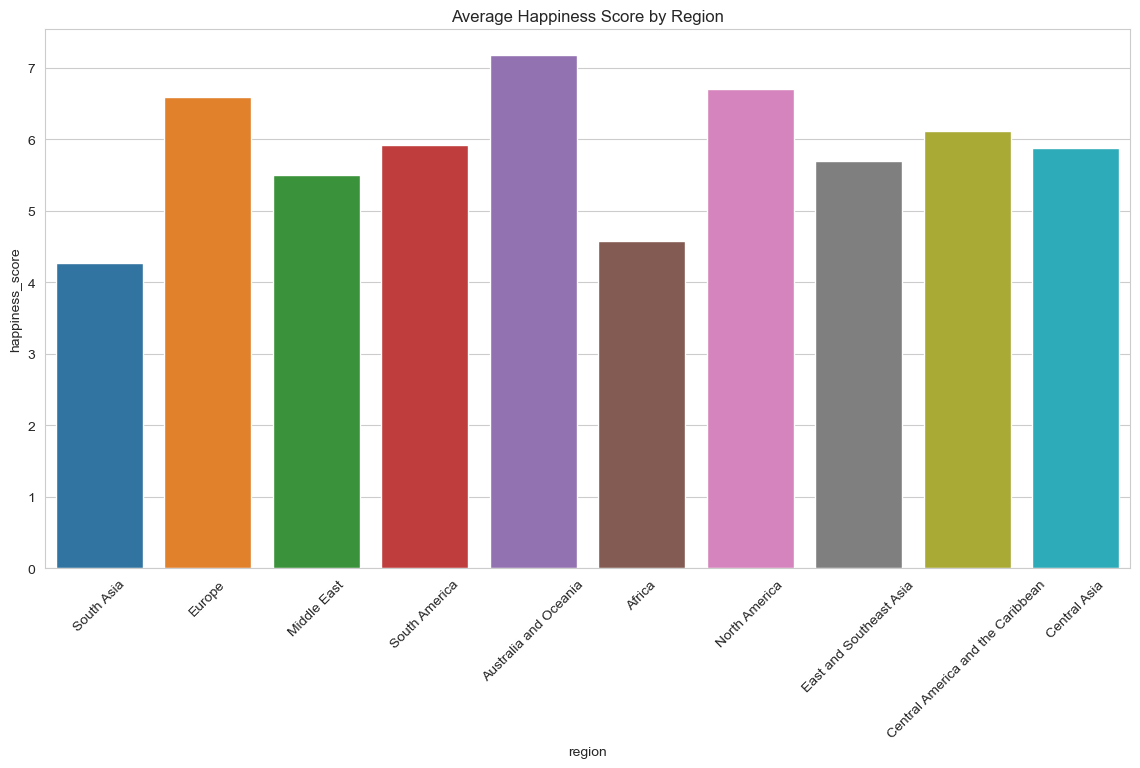

In [88]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# List of continuous variables
continuous_vars = ['happiness_score', 'education_expenditures', 'population_growth_rate', 'birth_rate', 'death_rate', 
           'unemployment_rate', 'GDP_per_capita', 'social_support', 'healthy_life_expectancy',
           'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'median_age']

# Plot histograms for continuous variables
plt.figure(figsize=(25, 15))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 5, i)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Distribution of {var.replace("_", " ").title()}', fontweight='bold')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.show()

# Bar plot of happiness score by region
plt.figure(figsize=(14, 7))
sns.barplot(x='region', y='happiness_score', data=df, errorbar=None)
plt.title('Average Happiness Score by Region')
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

Understand how various factors correlate with the happiness_score.

Visualize the correlation with heatmap:
- Positive correlations (closer to 1) are represented with warmer colors
- Negative correlations (closer to -1) are represented with cooler colors
- No correlation (closer to 0) would be in a neutral color

                              happiness_score  GDP_per_capita  social_support  \
happiness_score                      1.000000        0.820216        0.836458   
GDP_per_capita                       0.820216        1.000000        0.788297   
social_support                       0.836458        0.788297        1.000000   
healthy_life_expectancy              0.761289        0.862634        0.731107   
freedom_to_make_life_choices         0.673584        0.471492        0.562856   
generosity                           0.103800       -0.085797        0.077243   
perceptions_of_corruption            0.536114        0.453987        0.335902   
education_expenditures               0.415855        0.241599        0.351804   
population_growth_rate              -0.523132       -0.676630       -0.631992   
birth_rate                          -0.680956       -0.842582       -0.734731   
death_rate                           0.177294        0.253358        0.252198   
unemployment_rate           

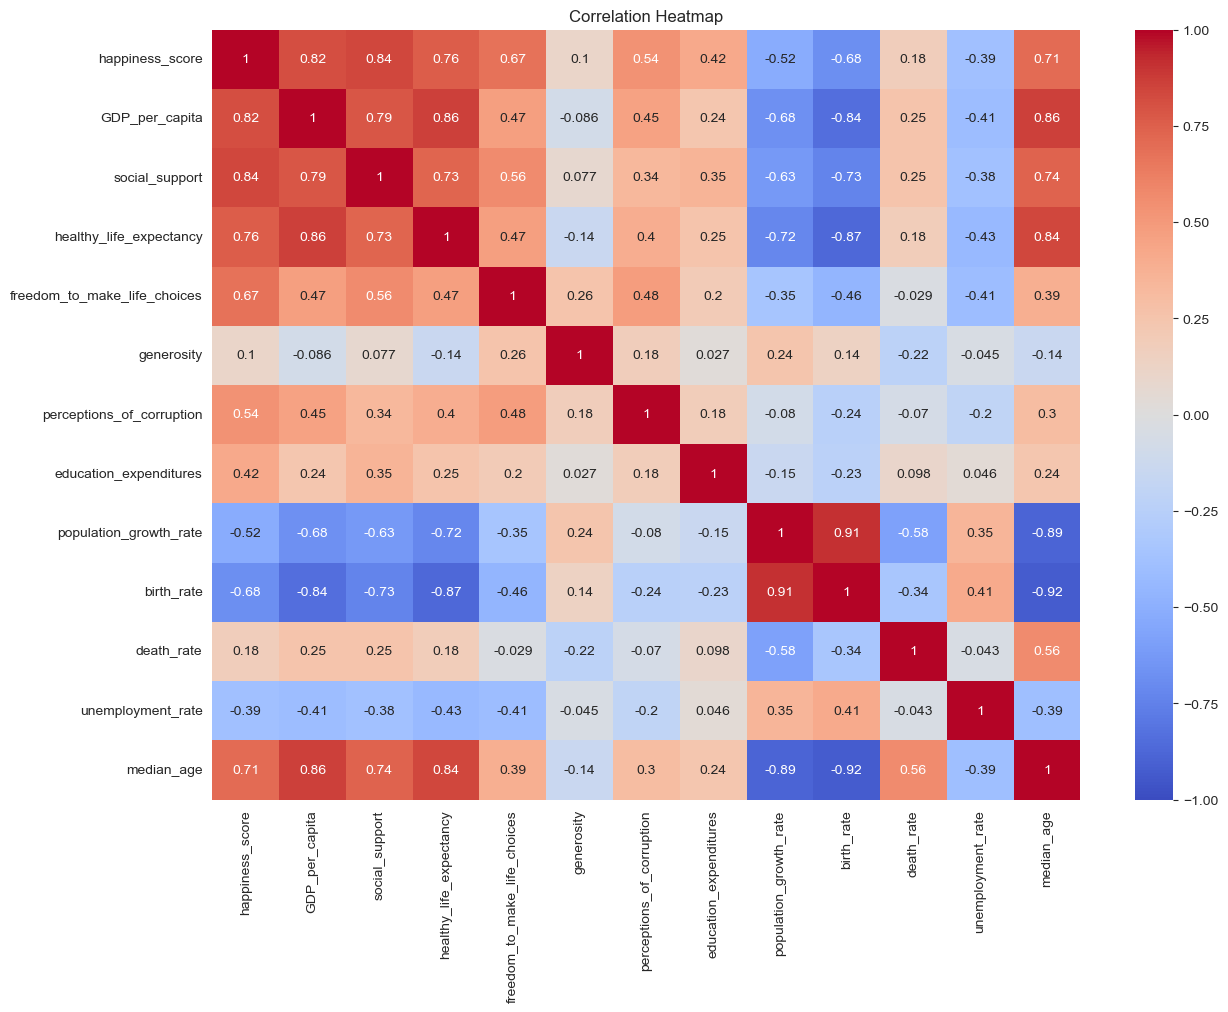

In [90]:
# Factors for correlation analysis with happiness_score
selected_columns = [
    'happiness_score', 'GDP_per_capita', 'social_support', 'healthy_life_expectancy', 
    'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 
    'education_expenditures', 'population_growth_rate', 'birth_rate', 
    'death_rate', 'unemployment_rate', 'median_age'
]

correlation_matrix = df[selected_columns].corr()
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

### Grouped Analysis
- Descriptive statistics by group
- Visual comparisons with box plots

In [91]:
print(df.groupby('happiness_group').describe())

                education_expenditures                                        \
                                 count      mean       std  min    25%   50%   
happiness_group                                                                
high                              24.0  5.675000  1.323779  2.2  5.175  5.85   
low                               26.0  3.696154  1.743670  0.5  2.750  3.40   
moderate                          55.0  4.681818  1.163184  2.1  3.800  4.60   

                            population_growth_rate            ...  \
                   75%  max                  count      mean  ...   
happiness_group                                               ...   
high             6.475  7.8                   24.0  0.660417  ...   
low              4.475  9.1                   26.0  1.970385  ...   
moderate         5.550  7.0                   55.0  0.500727  ...   

                perceptions_of_corruption        median_age             \
                              

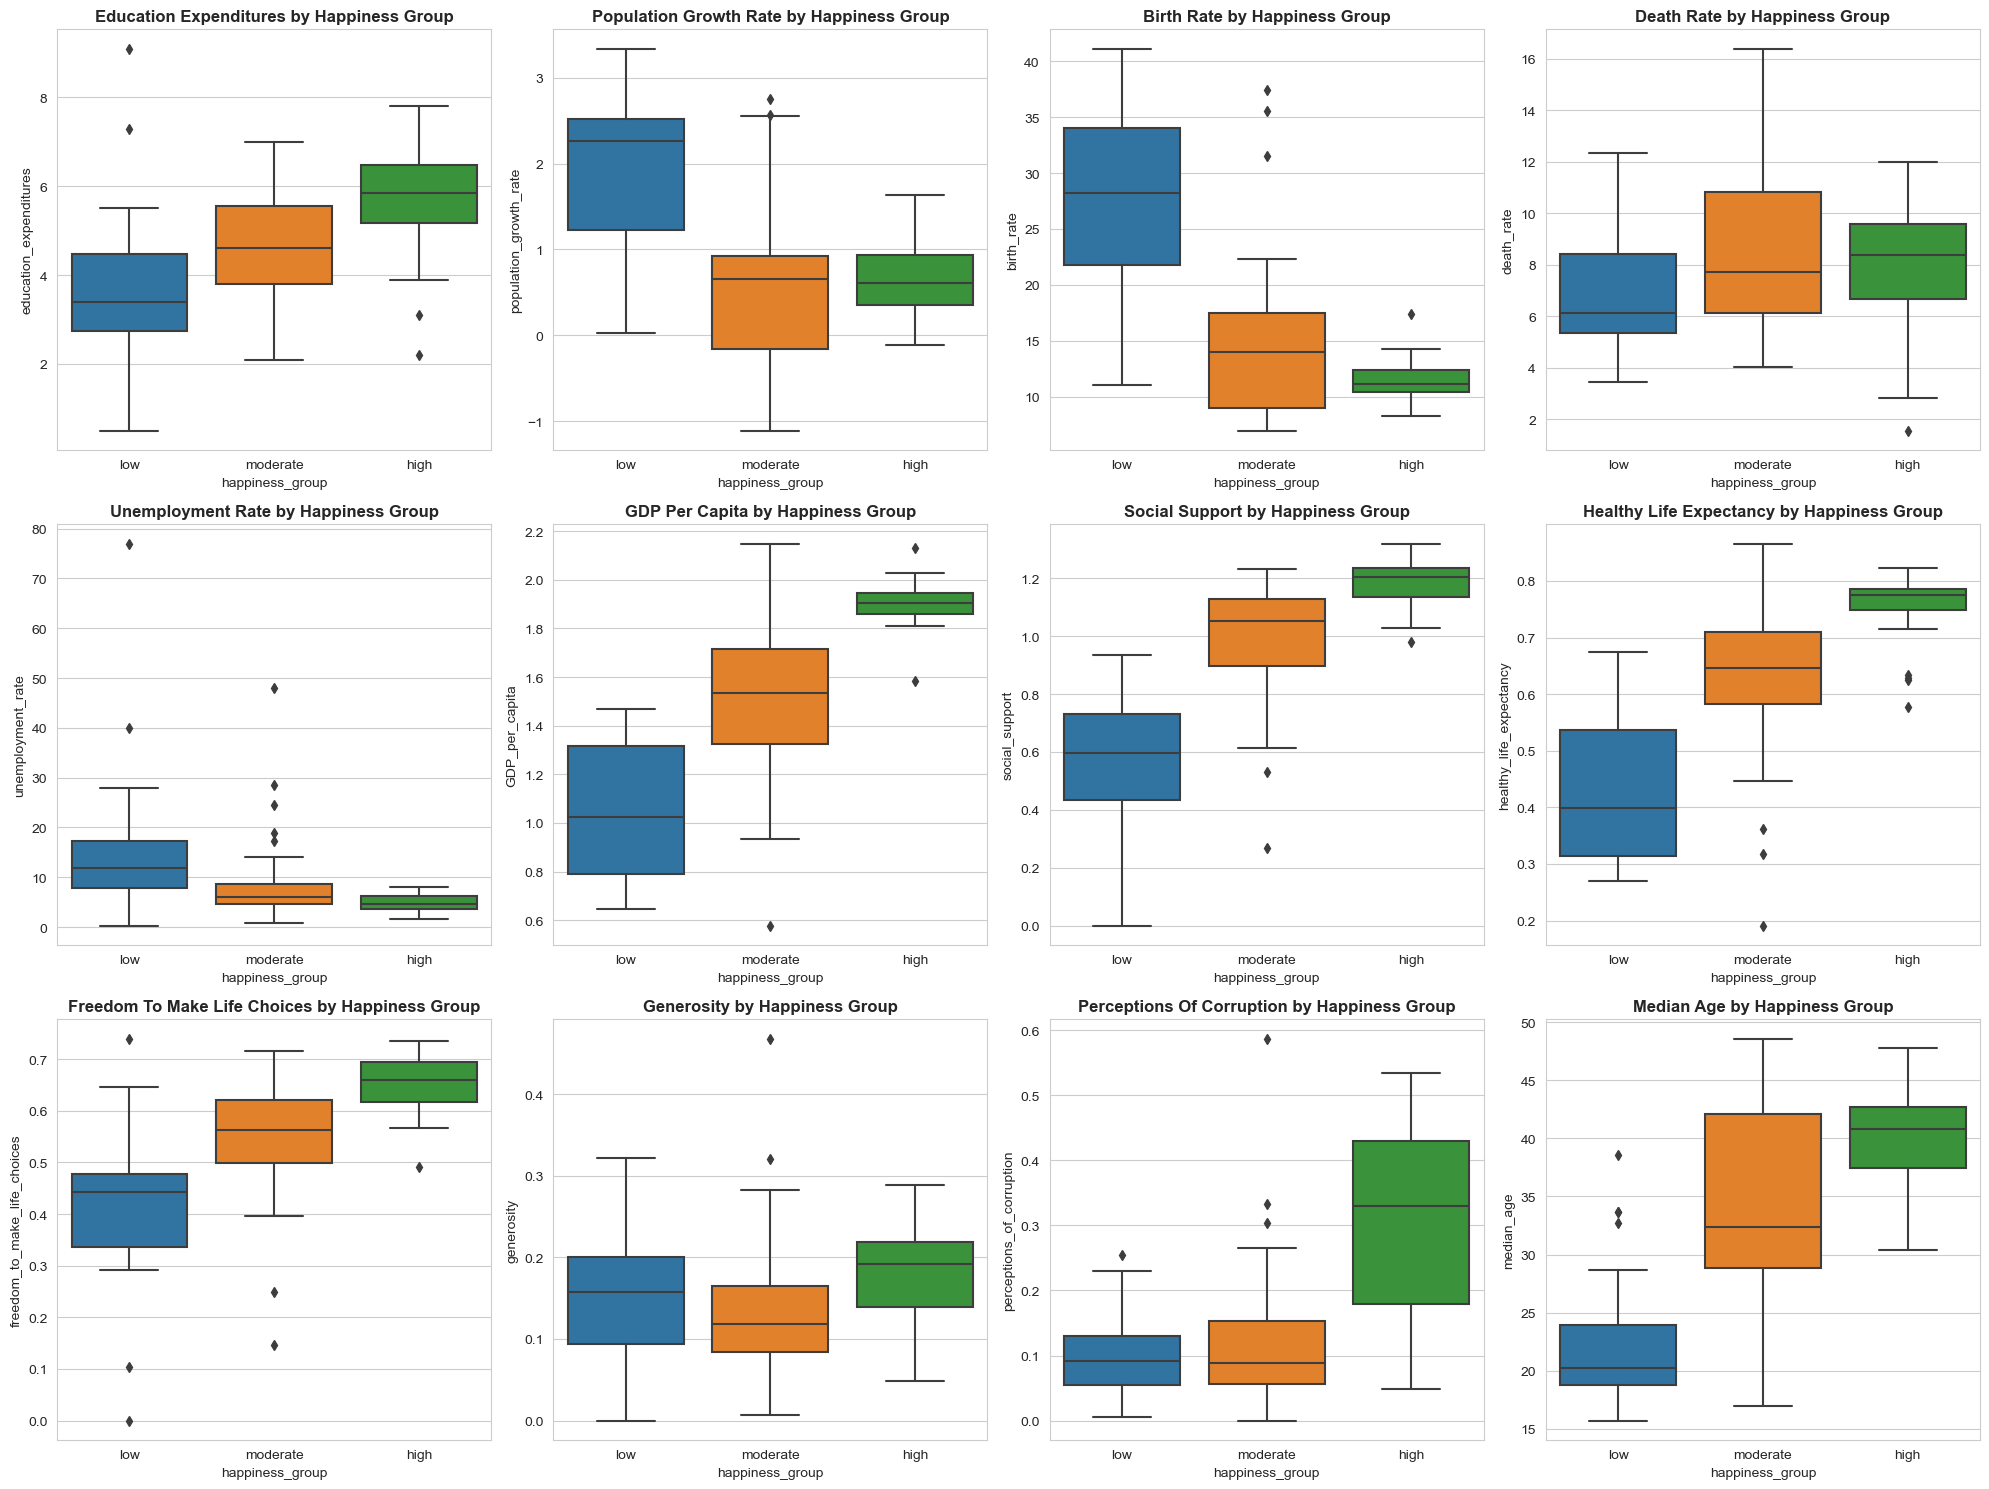

In [92]:
factors = [('education_expenditures', 'Education Expenditures'),
           ('population_growth_rate', 'Population Growth Rate'),
           ('birth_rate', 'Birth Rate'),
           ('death_rate', 'Death Rate'),
           ('unemployment_rate', 'Unemployment Rate'),
           ('GDP_per_capita', 'GDP Per Capita'),
           ('social_support', 'Social Support'),
           ('healthy_life_expectancy', 'Healthy Life Expectancy'),
           ('freedom_to_make_life_choices', 'Freedom To Make Life Choices'),
           ('generosity', 'Generosity'),
           ('perceptions_of_corruption', 'Perceptions Of Corruption'),
           ('median_age', 'Median Age')]

# Plotting boxplots for each factor
plt.figure(figsize=(20, 15))

for i, (factor, factor_pretty) in enumerate(factors, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns layout for subplots
    sns.boxplot(x='happiness_group', y=factor, data=df)
    plt.title(f'{factor_pretty} by Happiness Group', fontweight='bold')
    plt.tight_layout() 

plt.show()

### Scatter Plots and Regression

Create scatter plots with regression lines for the factors has strong correlation with happiness_score.

Correlations with happiness_score:
- GDP_per_capita: 0.82
- social_support: 0.84
- healthy_life_expectancy: 0.76
- freedom_to_make_life_choices: 0.67
- perceptions_of_corruption: 0.54
- median_age: 0.71
- birth_rate: -0.68
- population_growth_rate: -0.52

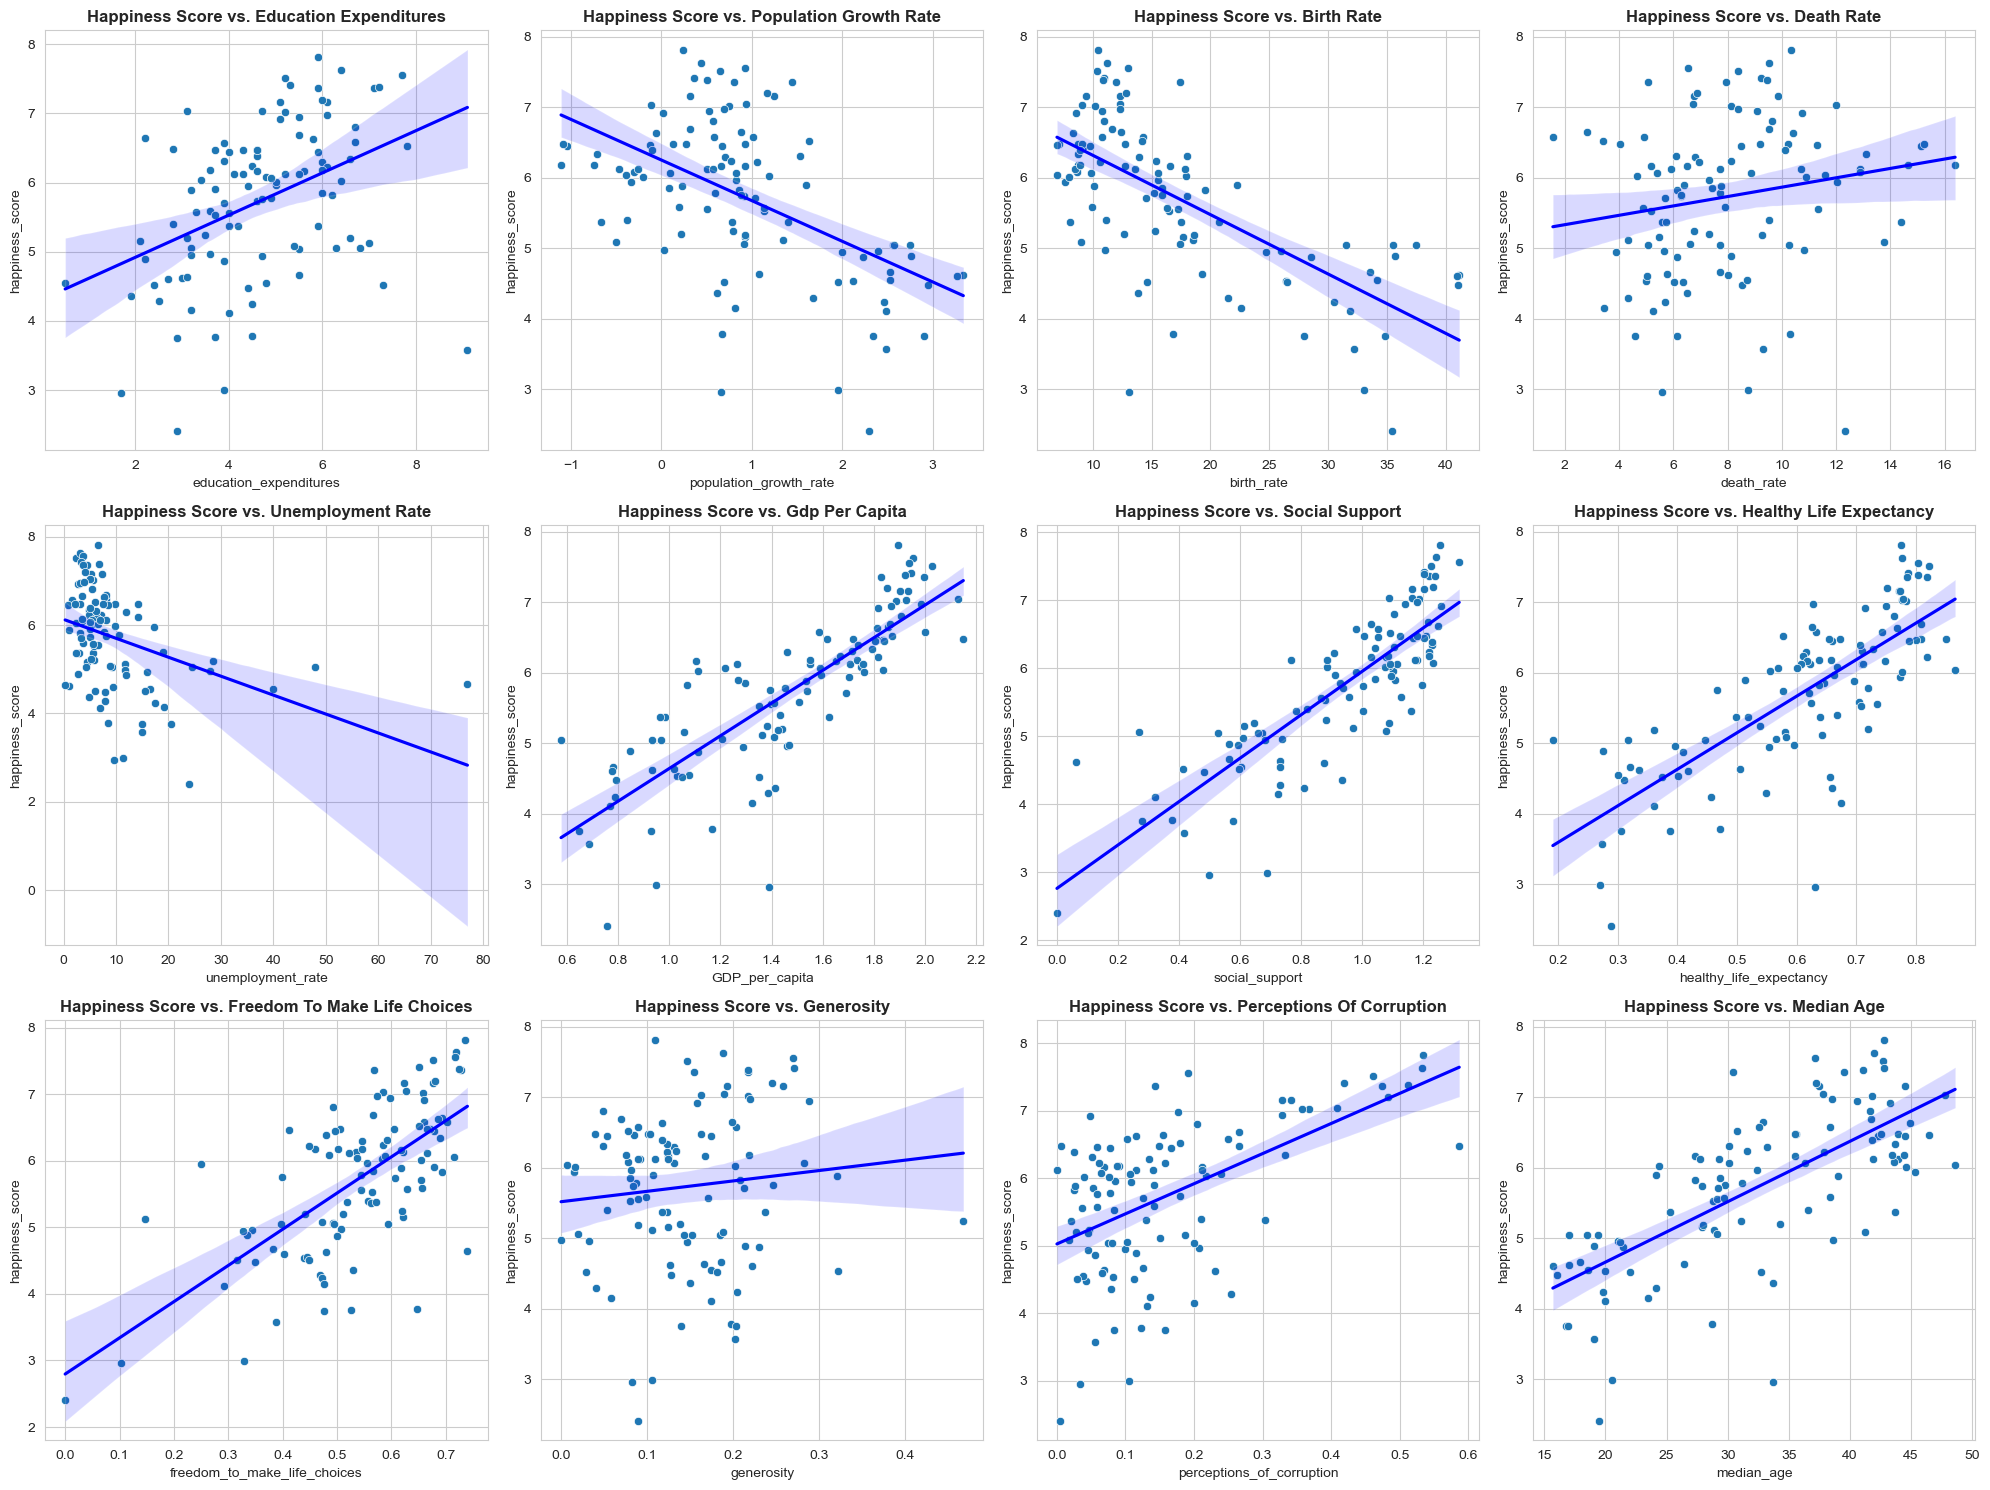

In [93]:
# List of variables to plot
continuous_vars = ['education_expenditures', 'population_growth_rate', 'birth_rate', 'death_rate', 
           'unemployment_rate', 'GDP_per_capita', 'social_support', 'healthy_life_expectancy',
           'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'median_age']

# Make all the plots in one figure
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=var, y='happiness_score', data=df)
    sns.regplot(x=var, y='happiness_score', data=df, scatter=False, color='blue')
    plt.title(f'Happiness Score vs. {var.replace("_", " ").title()}', fontweight='bold')
    plt.tight_layout()
plt.show()


### Linear Regression Model

In this section, we try to fit a linear regression model to our dataset and then evaluating its performance by comparing the predicted values with the actual values in a scatter plot.

The process includes the following steps:
- split the data into training and testing sets with 30% of the data reserved for testing. 
- create and train the linear regression model, and predict the happiness scores for the test data.
- plot a scatter plot to visualize the relationship between the actual and predicted happiness scores
- evaluate the performance of a regression model using metrics: Mean Squared Error (MSE) and R-squared Score

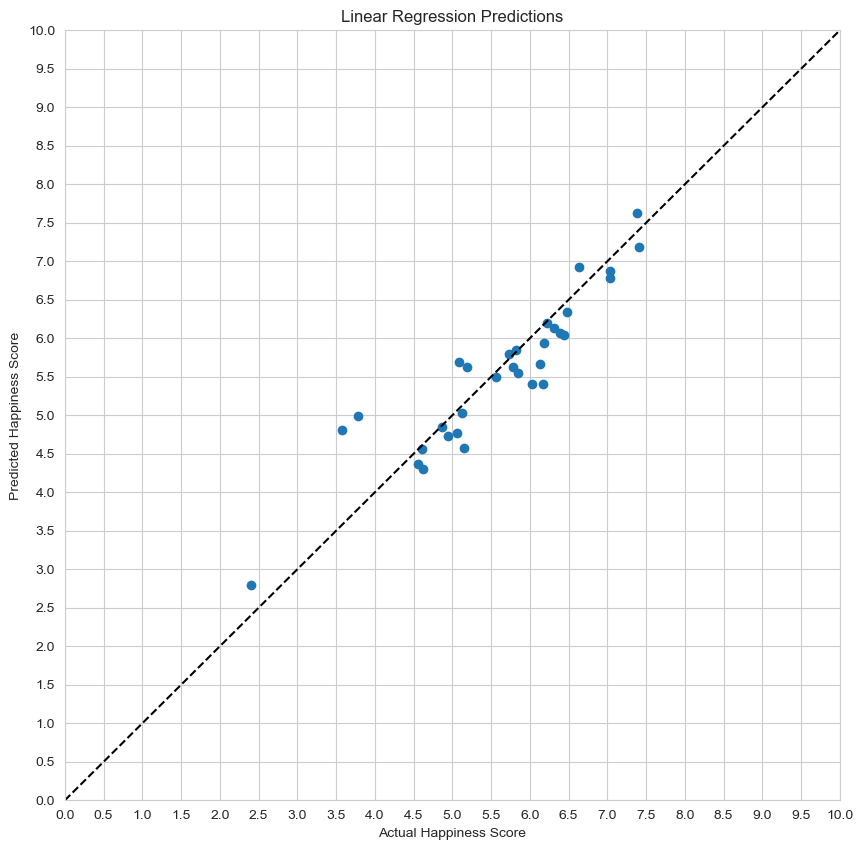

Mean Squared Error: 0.19644707898138825
R2 Score: 0.8377346196856976


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['education_expenditures', 'population_growth_rate', 'birth_rate', 'death_rate', 
           'unemployment_rate', 'GDP_per_capita', 'social_support', 'healthy_life_expectancy',
           'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'median_age']
x = df[features]
y = df['happiness_score']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Predict happiness score using the model
y_pred = linear_model.predict(x_test)

# Plot predicted vs actual values, draw a diagonal line
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Linear Regression Predictions')
# Set axis limits
plt.xlim(0, 10)
plt.ylim(0, 10)
# Set ticks
plt.xticks(np.arange(0, 10.5, 0.5))
plt.yticks(np.arange(0, 10.5, 0.5))
plt.plot([0, 10], [0, 10], 'k--')
plt.show()

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

### Decision Tree Regression Model
In this section, we explore fitting a Decision Tree Regression model to our dataset, and we aim to visually understand on how various features influence the happiness score. 

The process includes the following steps:
- divide the dataset into training and testing sets, allocating 30% of the data for testing
- create a Decision Tree Regressor model using DecisionTreeRegressor, specifying a maximum depth of 3 to control the size of the tree and prevent overfitting
- train the model with the training data
- visualize the decision tree

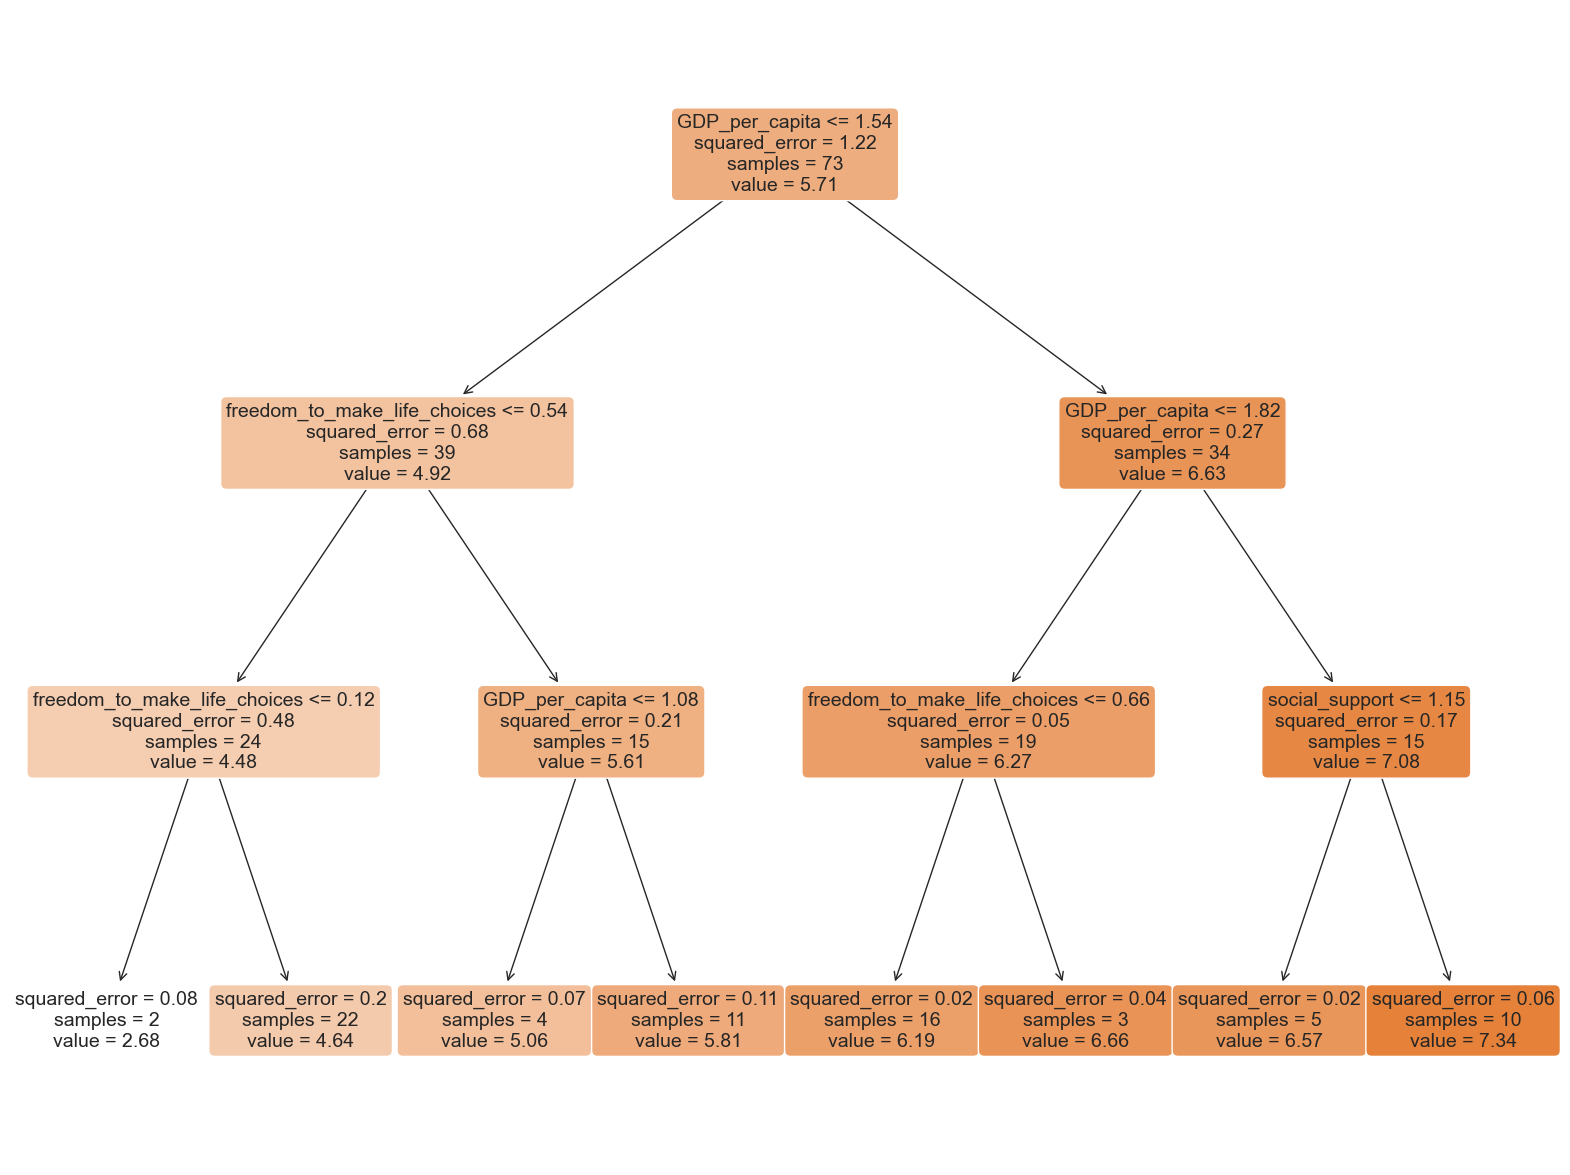

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

features = ['education_expenditures', 'population_growth_rate', 'birth_rate', 'death_rate', 
           'unemployment_rate', 'GDP_per_capita', 'social_support', 'healthy_life_expectancy',
           'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'median_age']
x = df[features]
y = df['happiness_score']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)

# Creating the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(x_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 15))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True, fontsize=14, precision=2, impurity=True)
plt.show()